# MovieLens Dataset Exploration

**Data source**

[MovieLens Tag Genome Dataset 2021]( https://grouplens.org/datasets/movielens/)



## 1. Import Packages

In [226]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 36.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/chloe/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [228]:
from nltk.corpus import stopwords

## 2. Load Datasets

In [78]:
# Load json files to dataframes
df_metadata_updated = pd.read_json('movie_dataset_public_final/raw/metadata_updated.json', lines=True)
df_ratings = pd.read_json('movie_dataset_public_final/raw/ratings.json', lines=True)
df_reviews = pd.read_json('movie_dataset_public_final/raw/reviews.json', lines=True)
df_tags = pd.read_json('movie_dataset_public_final/raw/tags.json', lines=True)
df_tag_count = pd.read_json('movie_dataset_public_final/raw/tag_count.json', lines=True)
df_survey_answers = pd.read_json('movie_dataset_public_final/raw/survey_answers.json', lines=True)

## 3. Explore Data

### 3.1 Explore dataset about movies

In [112]:
df_metadata_updated.head()

,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5


In [3]:
# Display the data types of each column
df_metadata_updated.dtypes

title          object
directedBy     object
starring       object
avgRating     float64
imdbId          int64
item_id         int64
dtype: object

In [113]:
# Replace empty strings with NaN
df_metadata_updated.replace('', np.nan, inplace=True)

# Print the shape of df
print(df_metadata_updated.shape)

# Count the number of missing values in each column
df_metadata_updated.isnull().sum()

(84661, 6)


title            0
directedBy    3147
starring      6883
avgRating        0
imdbId           0
item_id          0
dtype: int64

#### 3.1.1 metadata - avgRating

In [76]:
df_metadata_updated['avgRating'].describe()

count    84661.000000
mean         2.542259
std          1.318743
min          0.000000
25%          2.000000
50%          3.000000
75%          3.494950
max          5.000000
Name: avgRating, dtype: float64

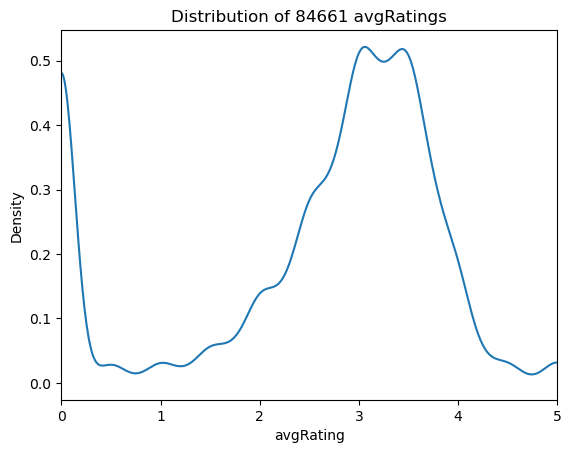

In [55]:
# Plot the distribution of 'avgRating'
ax = df_metadata_updated['avgRating'].plot(kind='kde')

# Set labels and title
plt.xlabel('avgRating')
plt.ylabel('Density')
plt.title('Distribution of 84661 avgRatings')

# Set x-axis limits
plt.xlim(0, 5)

# Show the plot
plt.show()

#### 3.1.2 metadata - title

In [5]:
df_metadata_updated[df_metadata_updated.duplicated(['title'], keep = False)].sort_values(by="title")

,title,directedBy,starring,avgRating,imdbId,item_id
21186,"20,000 Leagues Under the Sea (1997)",Rod Hardy,"Michael Caine, Patrick Dempsey, Mia Sara, Brya...",2.50000,118248,102190
24772,"20,000 Leagues Under the Sea (1997)",Michael Anderson,"Richard Crenna, Ben Cross, Julie Cox, Paul Gross",2.80000,118247,114130
67542,9 (2009),Candela Peña,"Elena Anaya,Francisco Boira,Pilar Castro,Pablo...",1.00000,1430606,204982
14218,9 (2009),Shane Acker,"Christopher Plummer, Martin Landau, John C. Re...",3.45896,472033,71057
19619,ATM (2012),David Brooks,"Alice Eve, Josh Peck, Brian Geraghty",2.51210,1603257,96456
...,...,...,...,...,...,...
62698,White Lily (2016),Tristan Ofield,"Siddhii Lagrutta,David McCaffrey",1.33333,5918946,195275
73880,Wretch (2019),Matthew Dunehoo,"Maria Olsen,Shannon Conley,Joe Rooney,Erin Day...",0.00000,8005088,217755
64291,Wretch (2019),Brian Cunningham,"Megan Massie,Spencer Korcz,Riker Hill,Savannah...",0.50000,7221072,198467
46095,Youth (2013),Tom Shoval,"Eitan Cunio,David Cunio,Moshe Ivgy,Shirili Des...",3.25000,2670524,161906


In [51]:
# Make a copy of the original df
df_metadata = df_metadata_updated

# Filter records whose title do not end with '(year)'
not_matching = df_metadata[~df_metadata['title'].str.contains(r'\(\d{4}\)')]

# Check other records with abnormal ending
not_matching[not_matching['title'].str.contains(r'\(\d{4}.*\)')]

,title,directedBy,starring,avgRating,imdbId,item_id,Title,Year
22740,Diplomatic Immunity (2009– ),"Murray Keane, Simon Bennett","David Fane, Craig Parker, Lesley-Ann Brandt",5.00000,1450364,107434,Diplomatic Immunity (2009– ),None
50951,Death Note: Desu nôto (2006–2007),NaN,NaN,4.06232,877057,171749,Death Note: Desu nôto (2006–2007),None


In [52]:
# Split the 'title' column into two columns
condition = df_metadata['title'].str.contains(r'\(\d{4}\)')
df_metadata['Title'] = np.where(condition, df_metadata['title'].str.rsplit('(', n =1).str[0], df_metadata['title'])
df_metadata['Year'] = np.where(condition, df_metadata['title'].str.rsplit('(', n =1).str[1].str[:-1], None)

# Reorder the columns, move the last two columns to the front
column_names = df_metadata.columns
df_metadata = df_metadata[column_names[-2:].append(column_names[:-2])]
df_metadata.head()

,Title,Year,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story,1995,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji,1995,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men,1995,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale,1995,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II,1995,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5


#### 3.1.3 metadata - starring

In [54]:
# Convert the 'starring' column of strings into lists of strings
df_metadata['starring'] = df_metadata['starring'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

# Count the length of 'starring' column
df_metadata['num_starring'] = df_metadata['starring'].apply(lambda x: len(x))
df_metadata.head()

,Title,Year,title,directedBy,starring,avgRating,imdbId,item_id,num_starring
0,Toy Story,1995,Toy Story (1995),John Lasseter,"[Tim Allen, Tom Hanks, Don Rickles, Jim Varney...",3.89146,114709,1,10
1,Jumanji,1995,Jumanji (1995),Joe Johnston,"[Jonathan Hyde, Bradley Pierce, Robin Williams...",3.26605,113497,2,4
2,Grumpier Old Men,1995,Grumpier Old Men (1995),Howard Deutch,"[Jack Lemmon, Walter Matthau, Ann-Margret , So...",3.17146,113228,3,4
3,Waiting to Exhale,1995,Waiting to Exhale (1995),Forest Whitaker,"[Angela Bassett, Loretta Devine, Whitney Houst...",2.86824,114885,4,4
4,Father of the Bride Part II,1995,Father of the Bride Part II (1995),Charles Shyer,"[Steve Martin, Martin Short, Diane Keaton, Kim...",3.07620,113041,5,6


In [57]:
df_metadata['num_starring'].describe()

count    84661.000000
mean         2.106909
std          2.728825
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         70.000000
Name: num_starring, dtype: float64

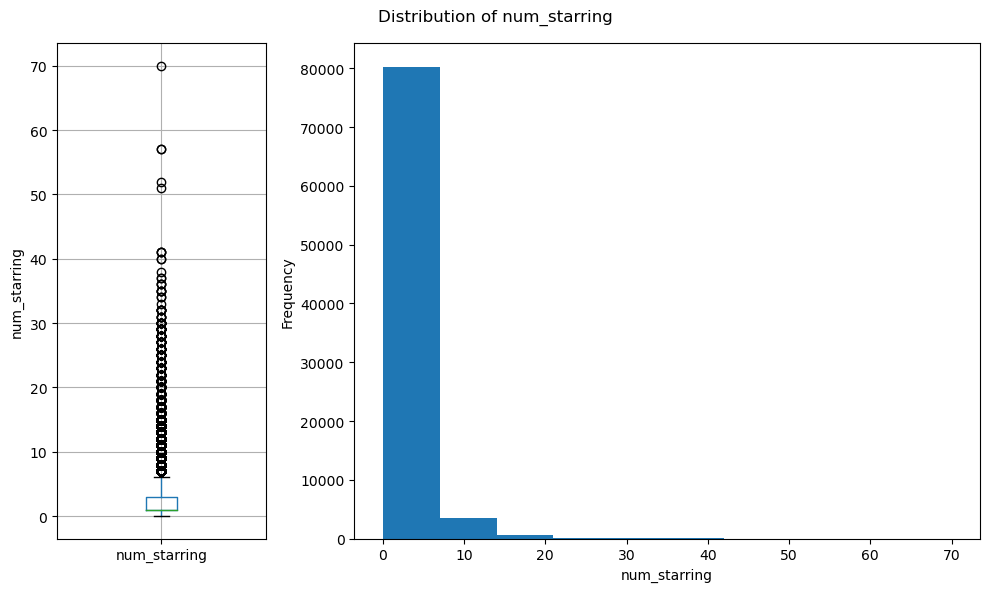

In [83]:
# Plot the distribution of 'num_starring' with a boxplot and a histogram 
# Create a figure and axes for subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 3]})

# Plot the boxplot on the left
df_metadata.boxplot(column='num_starring', ax=ax_boxplot)
ax_boxplot.set_ylabel('num_starring')

# Plot the histogram on the right
df_metadata['num_starring'].plot(kind='hist', ax=ax_hist)
ax_hist.set_xlabel('num_starring')
ax_hist.set_ylabel('Frequency')

# Set the title for the overall plot
plt.suptitle('Distribution of num_starring')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

###  3.2 tags  and tag_count          

In [95]:
df_tags.head()

,tag,id
0,aardman,22
1,secret service,112
2,hillarious,167
3,christian,270
4,mummy,362


In [96]:
df_tag_count.head()

,item_id,tag_id,num
0,1,86963,4
1,1,42940,1
2,1,37116,26
3,1,52206,1
4,1,34442,21


*'num'* coulmn shows the numbers of times users have attached the tag to the movie.

These two dfs share one column: *df_tags.id = df_tag_count.tag_id*, so we can join them together.

In [121]:
# Perform inner join on different column names
df_tags_comb = pd.merge(df_tags, df_tag_count, left_on='id', right_on='tag_id')

# Check whether joined df include all records from tag_count
assert df_tags_comb.shape[0] == df_tag_count.shape[0], "Inner join missed records."

# Reorder columns 
df_tags_comb = df_tags_comb[['item_id', 'tag', 'tag_id', 'num']]
df_tags_comb.sort_values('item_id')

,item_id,tag,tag_id,num
177747,1,cgi,87523,11
105973,1,disney animated feature,53486,1
84523,1,action,42940,1
77199,1,adventure,37116,26
201050,1,depression,102837,1
...,...,...,...,...
105564,239042,visually appealing,53302,1
105058,239044,religion,52817,1
92965,239044,jews,46718,1
100698,239044,jewish,51676,1


Each movie have multiple tags belongs to it, which inspires us to group by 'item_id'.

In [150]:
# Group by 'item_id' and create a list of 'tag_id' values within each group
series_tags_of_item = df_tags_comb.groupby('item_id').apply(lambda x: x['tag_id'].values.tolist())
# Convert the grouped data to a DataFrame
df_tags_of_item = pd.DataFrame(grouped_df, columns=['tag_id_list']).reset_index()
df_tags_of_item.head()

,item_id,tag_id_list
0,1,"[2688, 3668, 6384, 6859, 7892, 9083, 10736, 14..."
1,2,"[6384, 14267, 21285, 37108, 37116, 43498, 5520..."
2,3,"[26615, 28911, 37108, 60591, 103499]"
3,4,"[48211, 57872, 66988]"
4,5,"[11463, 15693, 26615, 37108, 39030, 61242, 728..."


In [118]:
print('Total number of tags: ', df_tags_comb['tag'].nunique())
print('Total number of movies: ', df_metadata['item_id'].nunique())
print('Number of tagged movies: ', df_tags_comb['item_id'].nunique(), ' ', df_tags_comb['item_id'].nunique()/df_metadata['item_id'].nunique())

Total number of tags:  1094
Total number of movies:  84661
Number of tagged movies:  39685   0.4687518455959651


Approximately half of the movies have been tagged. Tagged movies appear to be more popular than untagged ones, prompting us to think about the extent of overlap between tagged movies, rated movies, and reviewed movies.

In [123]:
df_tags_comb['num'].describe()

count    212704.000000
mean          3.915751
std          11.569772
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1117.000000
Name: num, dtype: float64

Max: 1117 is unexcepted large so let's draw a box plot of *'num'* to get a clear view of its distribution.

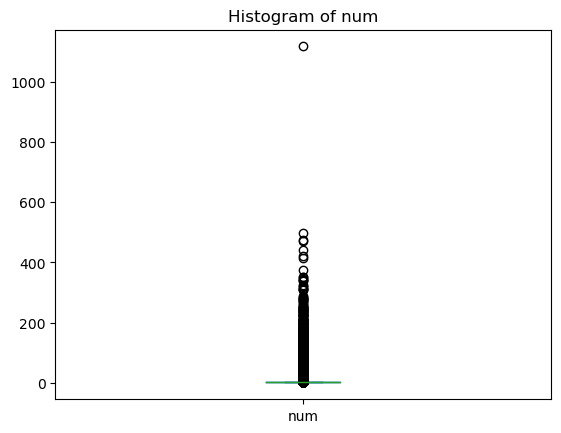

In [129]:
df_tags_comb['num'].plot(kind = 'box')
plt.title('Histogram of num')
plt.show()

In [151]:
# Combine metadata and tag_comb dfs 
df_movies_with_tags = pd.merge(df_metadata, df_tags_of_item, how='left', on='item_id')
df_movies_with_tags.head()

,Title,Year,title,directedBy,starring,avgRating,imdbId,item_id,num_starring,tag_id_list
0,Toy Story,1995,Toy Story (1995),John Lasseter,"[Tim Allen, Tom Hanks, Don Rickles, Jim Varney...",3.89146,114709,1,10,"[2688, 3668, 6384, 6859, 7892, 9083, 10736, 14..."
1,Jumanji,1995,Jumanji (1995),Joe Johnston,"[Jonathan Hyde, Bradley Pierce, Robin Williams...",3.26605,113497,2,4,"[6384, 14267, 21285, 37108, 37116, 43498, 5520..."
2,Grumpier Old Men,1995,Grumpier Old Men (1995),Howard Deutch,"[Jack Lemmon, Walter Matthau, Ann-Margret , So...",3.17146,113228,3,4,"[26615, 28911, 37108, 60591, 103499]"
3,Waiting to Exhale,1995,Waiting to Exhale (1995),Forest Whitaker,"[Angela Bassett, Loretta Devine, Whitney Houst...",2.86824,114885,4,4,"[48211, 57872, 66988]"
4,Father of the Bride Part II,1995,Father of the Bride Part II (1995),Charles Shyer,"[Steve Martin, Martin Short, Diane Keaton, Kim...",3.07620,113041,5,6,"[11463, 15693, 26615, 37108, 39030, 61242, 728..."


### 3.3 survey_answers 

In [159]:
df_survey_answers.head()

,user_id,item_id,tag_id,score
0,978707,3108,50126,3
1,978707,2858,50126,1
2,978707,1269,50126,1
3,978707,1136,50126,1
4,978707,1220,50126,1


In [168]:
# Merge two dfs on shared columns: 'item_id' and 'tag_id'
df_tags_with_scores = pd.merge(df_tag_count, df_survey_answers, how = 'left', on = ['item_id', 'tag_id'])
df_tags_with_scores.head()

,item_id,tag_id,num,user_id,score
0,1,86963,4,820082.0,1.0
1,1,86963,4,423144.0,2.0
2,1,86963,4,745878.0,1.0
3,1,86963,4,997388.0,1.0
4,1,86963,4,976135.0,5.0


In [175]:
# Check number of unscored tags
print('Number of unscored tags: ', df_tags_with_scores.score.isnull().sum(), ' ', 
      df_tags_with_scores.score.isnull().sum() / df_tags_with_scores.shape[0])

Number of unscored tags:  201028   0.9078994313999124


About 90% of tags are not scored, and we also know that about half of the movies are not tagged.

### 3.4 ratings

In [176]:
df_ratings

,item_id,user_id,rating
0,5,997206,3.0
1,10,997206,4.0
2,13,997206,4.0
3,17,997206,5.0
4,21,997206,4.0
...,...,...,...
28490111,104211,187144,1.5
28490112,104243,187144,3.5
28490113,104374,187144,3.5
28490114,104841,187144,3.0


In [186]:
print('Number of users: ', df_ratings['user_id'].nunique())
print('Number of movies rated: ', df_ratings['item_id'].nunique(), ' ', 
     df_ratings['item_id'].nunique() / df_metadata['item_id'].nunique())
print('Total number of movies: ', df_metadata['item_id'].nunique())
print('Number of movies whose avgRating is not zero:', (df_metadata['avgRating'] != 0).sum())

Number of users:  247383
Number of movies rated:  67873   0.801703263604257
Total number of movies:  84661
Number of movies whose avgRating is not zero: 70755


About 80% of movies have been rated. Compared with the percent of tagged movies (47%), we can see that people tend to rate movies more frequently than tagging them. 

One more thing to note here is that *avgRating = 0* does not mean this movie is not rated.

In [198]:
# Print unique value of 'rating'
sorted(df_ratings['rating'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [207]:
df_rating_counts = df_ratings.groupby('rating').size().reset_index(name='counts')
df_rating_counts

,rating,counts
0,0.5,452497
1,1.0,903188
2,1.5,459396
3,2.0,1893423
4,2.5,1431136
5,3.0,5642345
6,3.5,3547626
7,4.0,7561486
8,4.5,2450560
9,5.0,4148459


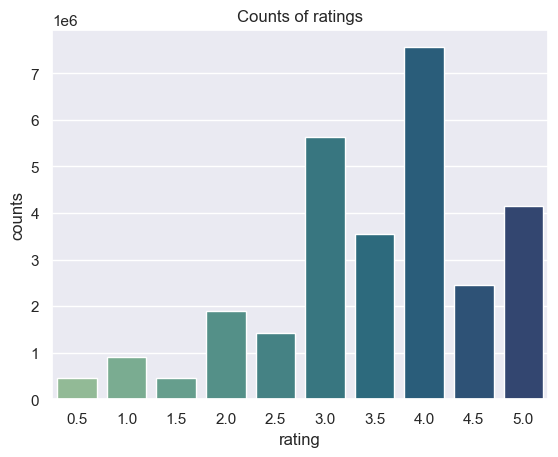

In [218]:
sns.set(style="darkgrid")
sns.barplot(data=df_rating_counts, x = 'rating', y = 'counts', palette = 'crest').set(title='Counts of ratings')

plt.show()

### 3.5 reviews

In [230]:
df_reviews

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
...,...,...
2624603,520,"Aims low, with hilarious results; ROBIN HOOD: ..."
2624604,8640,Worst epic of 2004; I usually love big epics i...
2624605,1377,superb Second Movie; I was glad to see that Ti...
2624606,26746,Seagal takes out the garbage; This is hard cor...


In [231]:
df_reviews.iloc[0,1]

'one-shot record of a belly dancer; "Carmencita Dancing," one of a series of Edison short films featuring \r circus and vaudeville acts, displayed the... um... "talents" of a zaftig belly-dancer who agreed to undulate before the camera of the famous "Black \r Maria" studio. \r \r The dance was originally intended to be played in a Kinetoscope, a single -person arcade viewer connected to Edison\'s more famous invention, the phonograph. Through a pair of crude headphones, the latter device supplied an asynchronous soundtrack of "hootchie-cootchie" music. \r \r The Kinetograph camera here employed is so new -- even to its inventors \r -- that director Dickson has drastically "overcranked" the film, unintentionally producing one of the first examples of slow-motion.\r \r Carmencita\'s titillating movements were considered by many to be \r scandalous. Thus, the film prompted some of the earliest discussions of film censorship.'

In [ ]:
# Define a function to split paragraph to words
def text_to_words(paragraph):
  sent_text = nltk.sent_tokenize(str(paragraph))
  all_tagged = [nltk.word_tokenize(sent) for sent in sent_text]
  flat_list = [item for sublist in all_tagged for item in sublist]
  return flat_list